# PrecisionFDA Brain Cancer Predictive Modeling and Biomarker Discovery Challenge

# Feature Selection For SubChallenge 1

## Import necessary packages and change directory to file location

In [1]:
!cd /home/kamil.kural/FdaPrecision Challenge

/usr/bin/sh: line 0: cd: /home/kamil.kural/FdaPrecision: No such file or directory


In [2]:
import numpy as np
import pandas as pd
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
from collections import defaultdict
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import eli5
import shap
from IPython.display import HTML
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from typing import List

import os
import time
import datetime
import json
import gc
from numba import jit

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import metrics
from typing import Any
from itertools import product
pd.set_option('max_rows', 500)
import re
from tqdm import tqdm
from joblib import Parallel, delayed

Using TensorFlow backend.


In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
import torch 
import fastai
import bayes_opt
import xgboost
import lightgbm

## Read necessary Files into dataframes, merge and do data cleaning and scaling

In [5]:
df1=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc1_Phase1_GE_FeatureMatrix.tsv', sep='\t')

In [6]:
df2=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc1_Phase1_GE_Outcome.tsv', sep='\t')

In [7]:
df3=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc1_Phase1_GE_Phenotype.tsv', sep='\t')

In [8]:
df = pd.merge(df2,
                    df1,
                    left_index=True,
                    right_index=True)
df = pd.merge(df,
                    df3,
                    left_index=True,
                    right_index=True)

In [9]:
df=df.drop(['PATIENTID','PATIENTID_x','PATIENTID_y'], axis=1)

In [10]:
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 4
Number of numerical features: 19336


In [11]:
categorical_list

['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']

In [13]:
X = df.drop(['SURVIVAL_STATUS'], axis=1)
y = df.SURVIVAL_STATUS
feature_name = X.columns.tolist()

In [14]:
X = pd.get_dummies(X, drop_first=True)

## First Feature Selection Method which consists of statistical checks, correlation between features, chi-square analysis, Recursive Feature Elimination using Logistic Regression and Embedded Feature Selection methods using Random Forest, LR and Light Gradient Boosting


### Each Feature is being checked for the implemented test and receives a True or False based on satisfied criteria. These values are then added together. The best features are selected based on how many criteria they have satisfied.

In [91]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-200:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [92]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

200 selected features


In [93]:
cor_feature

['CBR4',
 'PNN',
 'EZH1',
 'STARD10',
 'PSG2',
 'ZFAS1',
 'SNORD104',
 'WDR11',
 'TIAL1',
 'FAN1',
 'SPSB3',
 'MOCS1',
 'RPARP.AS1',
 'MC2R',
 'HDAC6',
 'ARMH3',
 'MBOAT7',
 'LOC100507388',
 'TBC1D10A',
 'CRAMP1',
 'CLK4',
 'RPL13',
 'LOC401261',
 'ZNF594',
 'AKAP10',
 'KBTBD7',
 'XRN1',
 'ZBED8',
 'HTATSF1',
 'MST1',
 'OR51E1',
 'MRPL43',
 'RBM17',
 'HARS2',
 'BRD8',
 'PRKX',
 'FLJ16779',
 'DCAF8',
 'FAM45BP',
 'CIRBP',
 'SNHG1',
 'KYAT1',
 'RPS24',
 'MLLT6',
 'KAT2A',
 'SEC31B',
 'SAT2',
 'FAM110A',
 'EEF1AKMT2',
 'NT5C2',
 'USP54',
 'TBC1D14',
 'CANCER_TYPE_UNKNOWN',
 'GID4',
 'KLHDC2',
 'SUPT3H',
 'D2HGDH',
 'KIN',
 'RABGAP1',
 'PHF1',
 'TMEM175',
 'VHL',
 'RPL31',
 'SERPINB8',
 'GCDH',
 'ZHX2',
 'LBHD1',
 'CLEC16A',
 'ZSWIM7',
 'COX15',
 'SYTL4',
 'PRTG',
 'FARSB',
 'RAB39A',
 'MRNIP',
 'AP1S1',
 'ARFGAP2',
 'BMS1',
 'PDCD4',
 'STX5',
 'HNRNPUL2',
 'ANKRA2',
 'RAB40A',
 'R3HCC1L',
 'KDM3B',
 'STOX1',
 'AAMDC',
 'GATA2',
 'DYNLL2',
 'KIZ',
 'SF3A1',
 'ADAMTS13',
 'NACA2',
 'SNHG19',
 'MYH3',
 'EAPP',
 'CPSF7',
 'SIX4',
 'DICER1.AS1',
 'ZFHX2',
 'DHTKD1',
 'FRA10AC1',
 'DLEU7.AS1',
 'ANKZF1',
 'AGER',
 'EP300',
 'THAP9',
 'IGFN1',
 'CASC3',
 'TUT1',
 'RPL5',
 'TMEM254',
 'RGS9',
 'ABRAXAS1',
 'CSKMT',
 'SUFU',
 'CUL9',
 'RCOR1',
 'PPWD1',
 'CEP131',
 'ARL4C',
 'C2orf27A',
 'RANGRF',
 'CCDC185',
 'FGF22',
 'HNRNPH3',
 'RPS14',
 'EDRF1',
 'CREBBP',
 'SIRT1',
 'RPA4',
 'ZNF518A',
 'RPL23',
 'NACAP1',
 'MCEE',
 'EXD3',
 'IST1',
 'CWF19L2',
 'HPS4',
 'GSDMB',
 'FBXL8',
 'RASSF4',
 'CLK1',
 'SETD1A',
 'CCS',
 'MTHFD2',
 'HFM1',
 'MPV17L',
 'KATNBL1',
 'JADE1',
 'DMRTA1',
 'IGBP1',
 'RACE_WHITE',
 'CTBP2',
 'GOLGB1',
 'MNAT1',
 'DDX59',
 'ZNF33A',
 'C14orf93',
 'LSR',
 'NRDE2',
 'NACA',
 'NSUN6',
 'ACBD4',
 'PTCD3',
 'RPL30',
 'SCRN2',
 'ASB3',
 'UBR5',
 'BTAF1',
 'EBF4',
 'RPL4',
 'POLL',
 'PURA',
 'PLAT',
 'ANAPC16',
 'PRDM11',
 'PCMTD1',
 'SHC2',
 'MED12',
 'UBE2NL',
 'CIR1',
 'SYCP2',
 'EIF3H',
 'HEXDC',
 'SAFB2',
 'CLNS1A',
 'MARCH8',
 'GMPR2',
 'SLC25A21.AS1',
 'ZSWIM8',
 'HAUS4',
 'NRN1',
 'CASTOR1',
 'SMARCC2',
 'RRNAD1',
 'ZNF32',
 'EIF3E',
 'PARD3',
 'UBXN1']

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=200)
chi_selector.fit(X_norm, y)

SelectKBest(k=200, score_func=<function chi2 at 0x7fd7a820b440>)

In [96]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

200 selected features


In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(n_jobs=60), n_features_to_select=200, step=1000, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 19351 features.
Fitting estimator with 18351 features.
Fitting estimator with 17351 features.
Fitting estimator with 16351 features.
Fitting estimator with 15351 features.
Fitting estimator with 14351 features.
Fitting estimator with 13351 features.
Fitting estimator with 12351 features.
Fitting estimator with 11351 features.
Fitting estimator with 10351 features.
Fitting estimator with 9351 features.
Fitting estimator with 8351 features.
Fitting estimator with 7351 features.
Fitting estimator with 6351 features.
Fitting estimator with 5351 features.
Fitting estimator with 4351 features.
Fitting estimator with 3351 features.
Fitting estimator with 2351 features.
Fitting estimator with 1351 features.
Fitting estimator with 351 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=60, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=200, step=1000, verbose=5)

In [98]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

200 selected features


In [99]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '15*median',max_features=200)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=200, norm_order=1, prefit=False,
                threshold='15*median')

In [100]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

200 selected features


In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000),max_features=200)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
 

In [102]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

200 selected features


In [103]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.0001, min_child_weight=0.0001)

embeded_lgb_selector = SelectFromModel(lgbc,max_features=200)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=0.0001,
                                         min_split_gain=0.0001,
                                         n_estimators=500, n_jobs=-1,
                                         num_leaves=32, objective=None,
                                         random_state=None, reg_alpha=3,
                                         reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
              

In [104]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

200 selected features


In [ ]:
### Feature Selector which adds all the satistied test criterias together

In [212]:
pd.set_option('display.max_rows', None)
# put all selection together
k={'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support}
feature_selection_df = pd.DataFrame.from_dict(k, orient='index')
feature_selection_df=feature_selection_df.transpose()
# Multiply by 1 so that True values get converted to 1 and False to 0
feature_selection_df[["Pearson", "Chi-2","RFE", "Logistics", "Random Forest", "LightGBM"]] *= 1
### A function to add parts of df together
def f(x):    
    return x[1] + x[2] + x[3] + x[4] + x[5] + x[6]
feature_selection_df['Total']= feature_selection_df.apply(f, axis=1)
# # display the top 200
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df2=feature_selection_df[['Feature','Total']]
feature_selection_df2.head()

,Feature,Total
1,GMPR2,6.0
2,CASTOR1,6.0
3,PLAT,5.0
4,MTHFD2,5.0
5,MED12,5.0


In [ ]:
# Convert the dataframe to list. This is done so that we can feed data to ML algorithms based on thresholds. (To see the difference between features which pass 4 tests vs 5 for example.)

In [215]:
feature_selection_df2=feature_selection_df2.values.tolist()

In [ ]:
# Define categorical variables again. Lightgbm accepts categorical variables 

In [216]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [220]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]


for threshold in [0, 1, 2, 3, 4, 5, 6]:
    features = [_f for _f, _Total, in feature_selection_df2 if _Total >= threshold]
    split_cat_feats = [_f for _f, _Total, in feature_selection_df2 if (_Total >= threshold) & (_f in categorical_feats)]
    
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=features, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    

Results for threshold   0
	 SPLIT : 0.634994 +/- 0.135744
Results for threshold   1
	 SPLIT : 0.845404 +/- 0.101338
Results for threshold   2
	 SPLIT : 0.879047 +/- 0.084275
Results for threshold   3
	 SPLIT : 0.911629 +/- 0.067268
Results for threshold   4
	 SPLIT : 0.800840 +/- 0.116774
Results for threshold   5
	 SPLIT : 0.778933 +/- 0.109481
Results for threshold   6
	 SPLIT : 0.690489 +/- 0.165425


In [ ]:
# This possibly implies that we can actually create a model based on only 2 genes to predict survival status. (GMPR2 and CASTOR1) or 6

In [161]:
feature_selection_df.head(88)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,GMPR2,1,1,1,1,1,1,6.0
2,CASTOR1,1,1,1,1,1,1,6.0
3,PLAT,1,1,1,1,1,0,5.0
4,MTHFD2,1,1,1,1,1,0,5.0
5,MED12,1,1,1,1,1,0,5.0
6,HAUS4,1,1,0,1,1,1,5.0
7,SMARCC2,1,1,0,1,1,0,4.0
8,SHC2,1,1,1,1,0,0,4.0
9,SCRN2,1,1,1,0,0,1,4.0
10,PRDM11,1,1,1,0,0,1,4.0


In [208]:
feature_selection_df2=feature_selection_df[['Feature','Total']]

In [213]:
feature_selection_df2.to_csv('SubChallenge1_Feature_list')

## Remember these values. Now,I will use another feature selection method called Null Importance described in this paper: https://academic.oup.com/bioinformatics/article/26/10/1340/193348 P-values computed with permutation importance (PIMP)

In [575]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

## Use Lightgbm's version of Randomforest since it is faster

In [582]:
def get_feature_importances(data, shuffle, seed=None):
    # Gather real features
    train_features = [x for x in df.columns if x not in ['SURVIVAL_STATUS']]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = df['SURVIVAL_STATUS'].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = df['SURVIVAL_STATUS'].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 25,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 60
        #num_leaves= 26, feature_fraction= 0.4, learning_rate= 0.01, bagging_fraction= 1, max_depth= 25,scale_pos_weight=0.5, min_child_weight= 1, n_estimators= 200, lambda_l1= 1, lambda_l2= 2, min_split_gain=0.01, n_jobs= 20, verbose=1
    }
    
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200,categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

In [578]:
from sklearn.metrics import roc_auc_score
# Seed the unexpected randomness of this world
np.random.seed(123)
# Get the actual importance, i.e. without shuffling
actual_imp_df = get_feature_importances(data=df, shuffle=False)

In [579]:
actual_imp_df.head()

,feature,importance_gain,importance_split,trn_score
0,A1BG,0.000000000000306,97,0.979850836039938
1,A1BG.AS1,0.000000000000097,33,0.979850836039938
2,A1CF,0.357358992099812,14,0.979850836039938
3,A2M,1.842923015356073,8,0.979850836039938
4,A2M.AS1,0.738088995218281,3,0.979850836039938


### Run Randomforest 100 times and collect results

In [221]:
null_imp_df = pd.DataFrame()
nb_runs = 100
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(data=df, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

In [584]:
null_imp_df.to_csv('null_importances_distribution_rf.csv')
actual_imp_df.to_csv('actual_importances_ditribution_rf.csv')

In [591]:
null_imp_df=pd.read_csv('null_importances_distribution_rf.csv')
actual_imp_df=pd.read_csv('actual_importances_ditribution_rf.csv')

In [592]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
        

### Calculate Feature Importances based on split and gain score as described in the paper

In [ ]:
feature_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

In [597]:
feature_score_precision = pd.DataFrame(feature_scores)
feature_score_precision.to_csv('feature_scores_rf.csv')

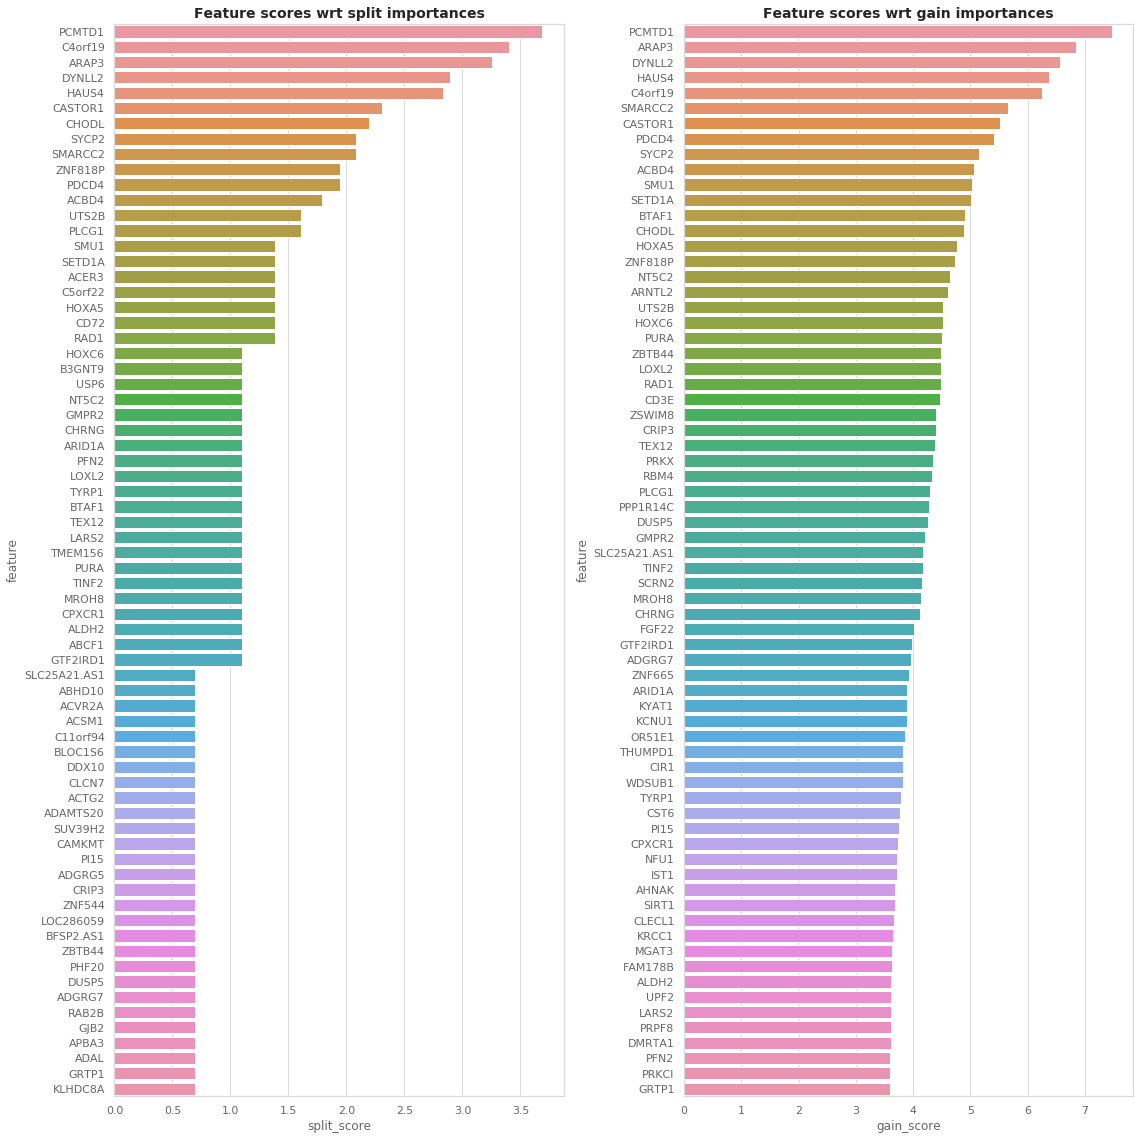

In [598]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

### Feature scores calculated based on correlation between split and gain

In [ ]:
correlation_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].values
    gain_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].values
    split_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    correlation_scores.append((_f, split_score, gain_score))

corr_scores_df = pd.DataFrame(correlation_scores, columns=['feature', 'split_score', 'gain_score'])

In [ ]:
corr_scores_df.to_csv('correlation_scores_rf.csv')

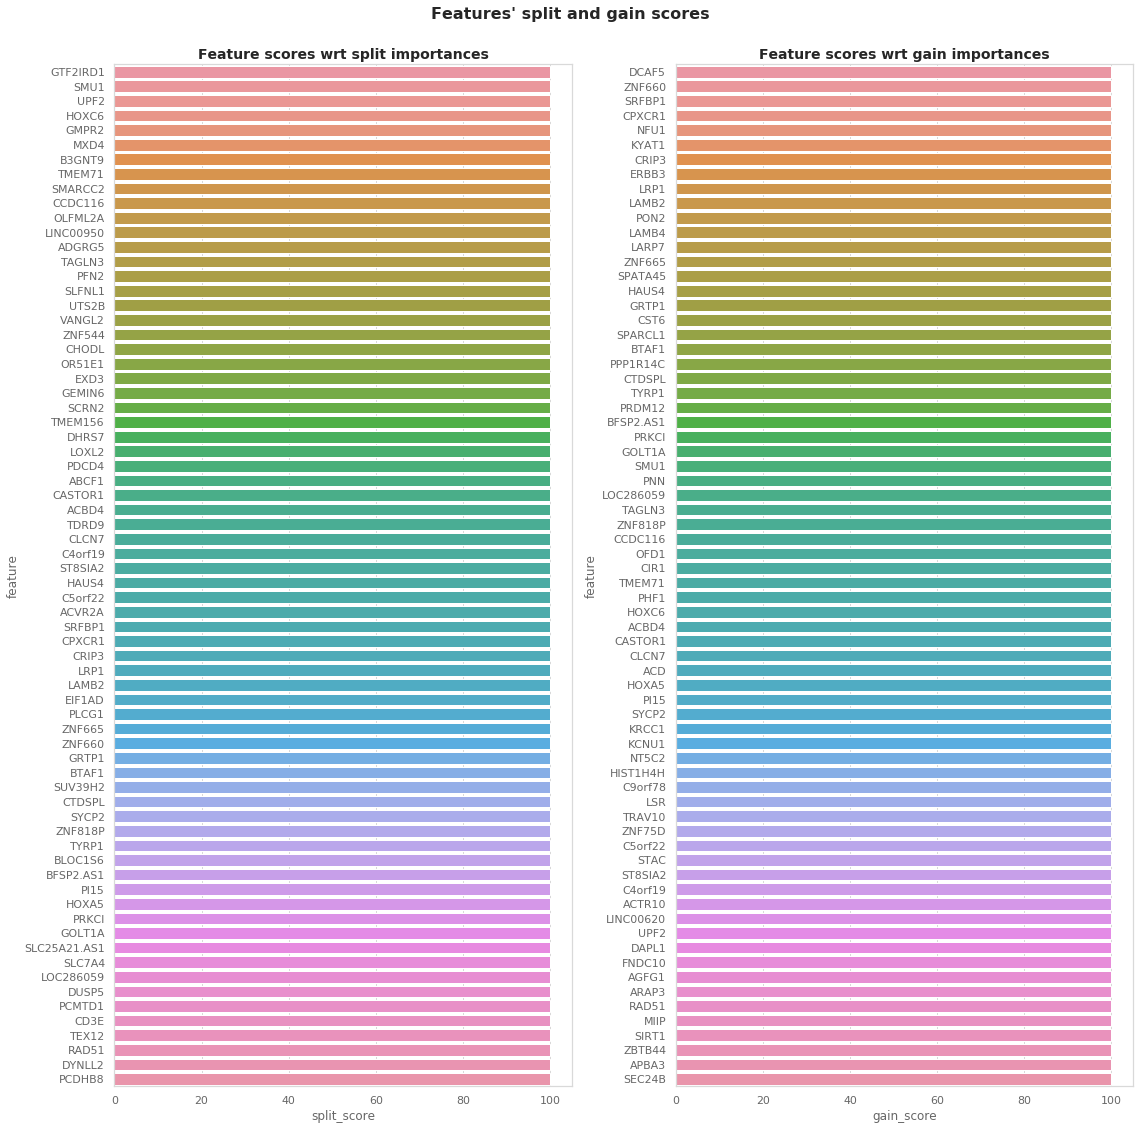

In [601]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=corr_scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=corr_scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.suptitle("Features' split and gain scores", fontweight='bold', fontsize=16)
fig.subplots_adjust(top=0.93)

### Let's see how features with high Correlation scores behave when fed into the algorithm with different thresholds

In [639]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=5,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=50,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]


for threshold in [0, 10, 20, 30 , 40, 50 ,60 , 70, 80 , 90, 95, 99, 99.5, 99.9]:
    split_feats = [_f for _f, _score, _ in correlation_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in correlation_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3f' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold 0.000000
	 SPLIT : 0.651677 +/- 0.038593
	 GAIN  : 0.651677 +/- 0.038593
Results for threshold 10.000000
	 SPLIT : 0.812775 +/- 0.061718
	 GAIN  : 0.810571 +/- 0.074314
Results for threshold 20.000000
	 SPLIT : 0.791480 +/- 0.057915
	 GAIN  : 0.792195 +/- 0.051283
Results for threshold 30.000000
	 SPLIT : 0.817555 +/- 0.067694
	 GAIN  : 0.771626 +/- 0.064440
Results for threshold 40.000000
	 SPLIT : 0.781361 +/- 0.068067
	 GAIN  : 0.780857 +/- 0.065404
Results for threshold 50.000000
	 SPLIT : 0.782038 +/- 0.067480
	 GAIN  : 0.792192 +/- 0.078038
Results for threshold 60.000000
	 SPLIT : 0.770134 +/- 0.070986
	 GAIN  : 0.797816 +/- 0.074616
Results for threshold 70.000000
	 SPLIT : 0.777200 +/- 0.079455
	 GAIN  : 0.753655 +/- 0.058820
Results for threshold 80.000000
	 SPLIT : 0.781980 +/- 0.070928
	 GAIN  : 0.778038 +/- 0.067268
Results for threshold 90.000000
	 SPLIT : 0.769100 +/- 0.060061
	 GAIN  : 0.777866 +/- 0.067233
Results for threshold 95.000000
	 SPLIT :

### Seems like the best bet is to use Split with thresholds 99.5 so that when we fit our model, we have lower chance to overfit. Unfortunately, that adds up to 90 genes. Which would be too many if we want to win the competition :)

#### Let's do it without the correlation scores this time

In [634]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]


for threshold in [-23, 0, 1, 2, 3, 4, 4.2, 4.5, 4.7, 5, 5.1, 5.4, 5.5, 6, 7]:
    split_feats = [_f for _f, _score, _ in feature_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in feature_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3f' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold -23.000000
	 SPLIT : 0.844324 +/- 0.082797
	 GAIN  : 0.783415 +/- 0.121891
Results for threshold 0.000000
	 SPLIT : 0.800568 +/- 0.111567
	 GAIN  : 0.774299 +/- 0.108053
Results for threshold 1.000000
	 SPLIT : 0.874621 +/- 0.089617
	 GAIN  : 0.784994 +/- 0.106106
Results for threshold 2.000000
	 SPLIT : 0.832544 +/- 0.113295
	 GAIN  : 0.795587 +/- 0.120151
Results for threshold 3.000000
	 SPLIT : 0.764116 +/- 0.116145
	 GAIN  : 0.839804 +/- 0.118966
Results for threshold 4.000000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.857626 +/- 0.109052
Results for threshold 4.200000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.865511 +/- 0.087439
Results for threshold 4.500000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.865985 +/- 0.076879
Results for threshold 4.700000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.859104 +/- 0.091395
Results for threshold 5.000000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.851035 +/- 0.098290
Results for threshold 5.100000
	 SPLIT : 0.50000

### There are 12 genes above 5.0 threshold. These genes are: 

PCMTD1,  
ARAP3,  
DYNLL2,  
HAUS4,  
C4orf19,   
SMARCC2,  
CASTOR1,  
PDCD4,  
SYCP2,  
ACBD4,  
SMU1,  
SETD1A

Based on the results we get, we can even create a model with 5 genes which pass the threshold of 6. But we have a higher chance of overfitting while trying to find optimal hyperparameters for the model.  (PCMTD1, ARAP3, DYNLL2, HAUS4, C4orf19 are the genes which pass the threshold of 6.)
Only PCMTD1 passes the threshold of 7


### A Function to display feature importances vs null importance

In [613]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
        

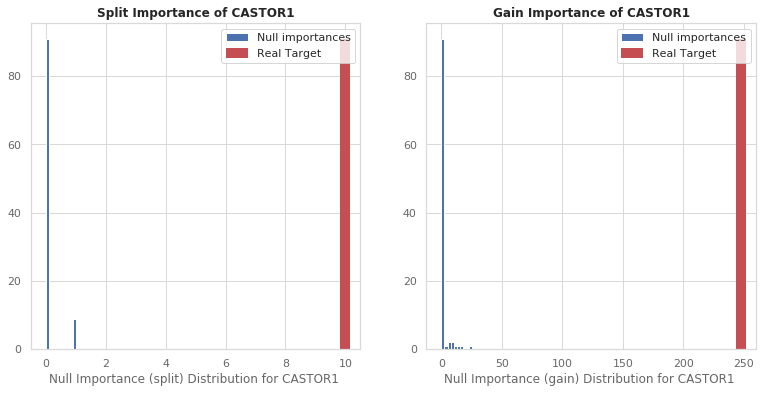

In [617]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='CASTOR1')

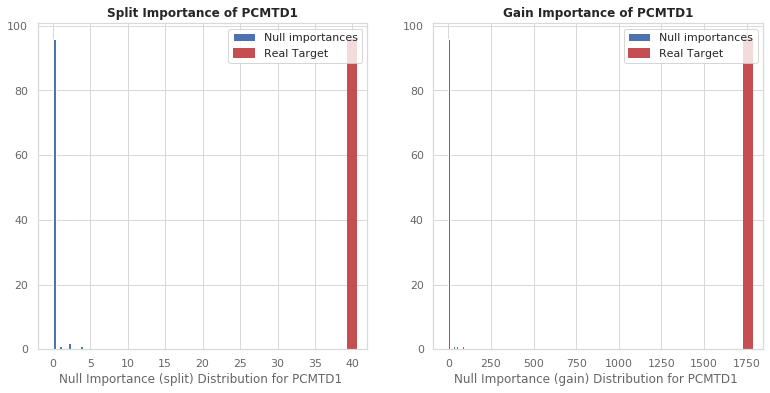

In [618]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='PCMTD1')

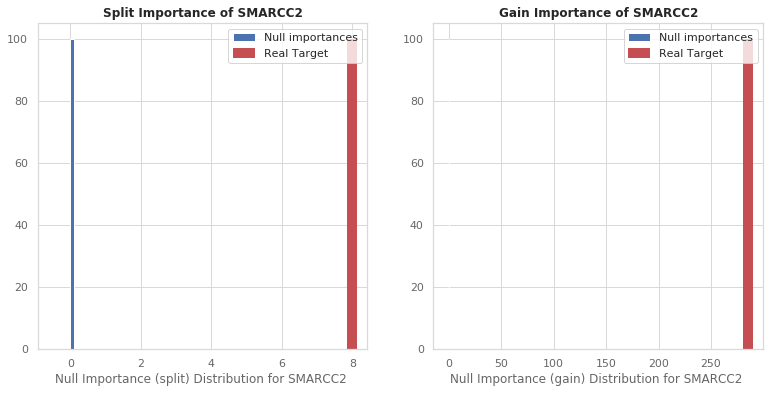

In [619]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='SMARCC2')

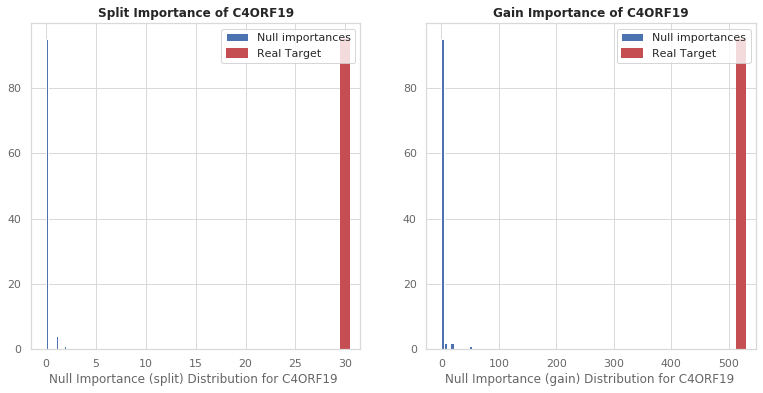

In [620]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='C4orf19')

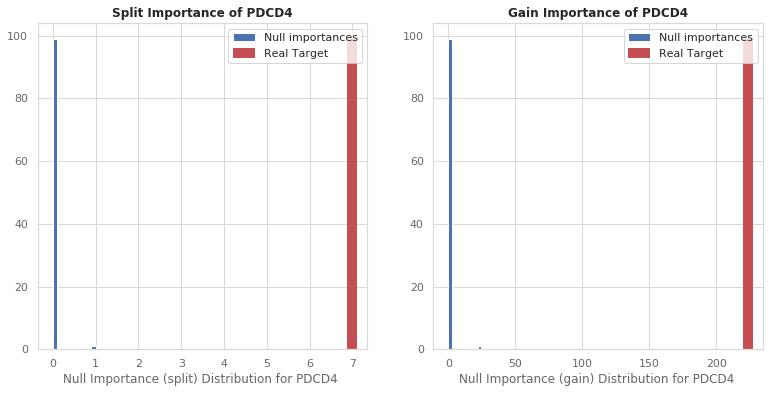

In [622]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='PDCD4')

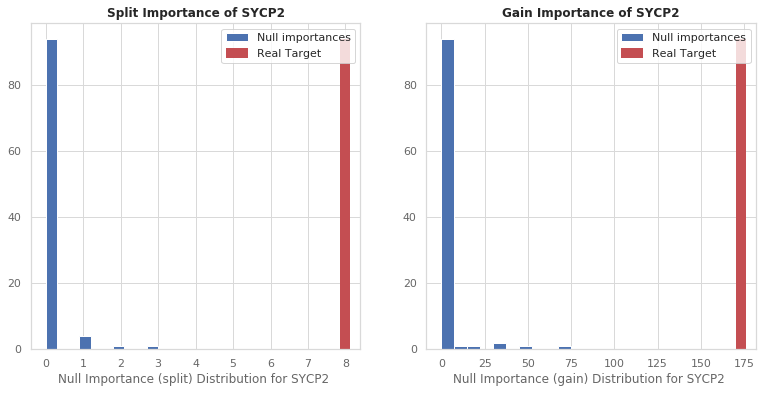

In [626]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='SYCP2')

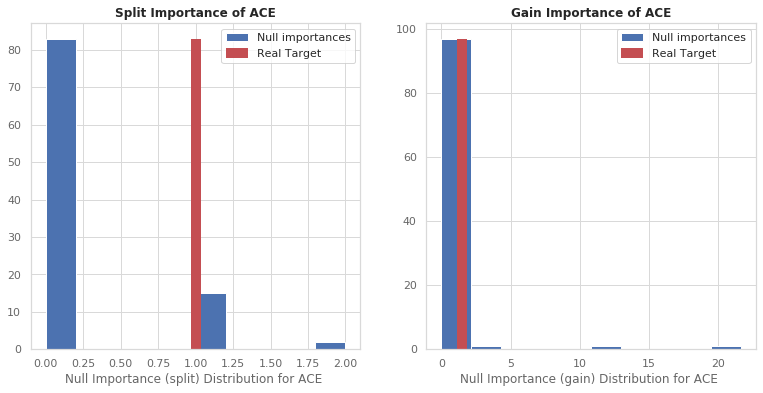

In [627]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='ACE')


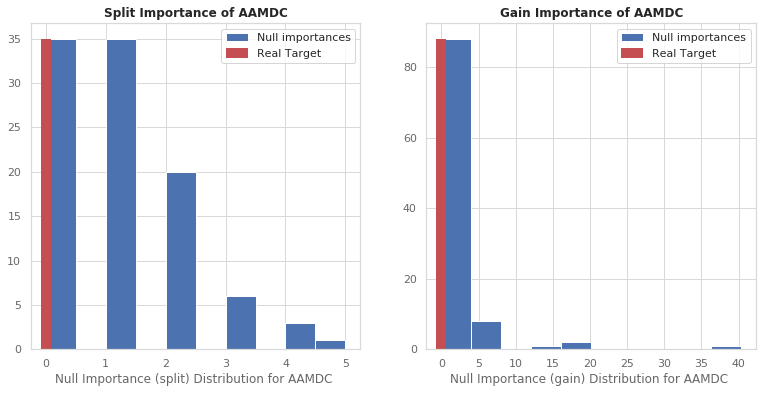

In [625]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='AAMDC')


### Perhaps, combining the important features from both methods identified with different approaches is the best way to go?  However, we will only use features coming from calculated null importances. We picked our important features below with the minimum number of possible genes being the most important criteria.

Selecting 5 as threshold yields with: 
PCMTD1
ARAP3
DYNLL2
HAUS4
C4orf19
SMARCC2
CASTOR1
PDCD4
SYCP2
ACBD4
SMU1
SETD1A 
are the important features 

Selecting 5.5 as threshold yields with: 

PCMTD1
ARAP3
DYNLL2
HAUS4
C4orf19
SMARCC2
CASTOR1
are the important features coming from Subchallenge 1.

PCMTD1,
ARAP3,
DYNLL2,
HAUS4,
C4orf19,
SMARCC2,
CASTOR1,
PDCD4,
SYCP2,
ACBD4,
SMU1,
SETD1A
GMPR2
PLAT
MTHFD2
MED12

adds up to 16 target genes which can be used to create new models in the future.


In [322]:
dfnew= df[['PCMTD1', 'ARAP3','DYNLL2' ,'HAUS4', 'C4orf19', 'SMARCC2', 'CASTOR1' ,'PDCD4','SYCP2', 'ACBD4','SMU1' ,'SETD1A', 'GMPR2', 'PLAT', 'MTHFD2' ,'MED12']]

In [ ]:
dfnew= df[['PCMTD1', 'ARAP3','DYNLL2' ,'HAUS4', 'C4orf19', 'SMARCC2', 'CASTOR1']]